In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.datasets import imdb
from keras.callbacks import TensorBoard

In [ ]:
file = open('Royal_data.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


**Removing '\n' from the end of every sentence and convert the sentence into**

In [ ]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n','')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


**Removing stop words**

In [ ]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []


for sent in royal_data:             # sent[0]= 'the future king is the prince'
    temp = []
    for word in sent.split():       #word[0] = 'the'
        if word not in stopwords:
            temp.append(word)
            print(temp)
    filtered_data.append(temp)

print(filtered_data)

['future']
['future', 'king']
['future', 'king', 'prince']
['daughter']
['daughter', 'princess']
['son']
['son', 'prince']
['man']
['man', 'king']
['woman']
['woman', 'queen']
['princess']
['princess', 'queen']
['prince']
['prince', 'strong']
['prince', 'strong', 'man']
['princess']
['princess', 'beautiful']
['princess', 'beautiful', 'woman']
['prince']
['prince', 'boy']
['prince']
['prince', 'king']
['boy']
['boy', 'man']
[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


**Creating bigrams**

In [ ]:
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
      for j in range(i+1, len(words_list)):
         print(words_list[i],words_list[j])

future king
future prince
king prince
daughter princess
son prince
man king
woman queen
princess queen
prince strong
prince man
strong man
princess beautiful
princess woman
beautiful woman
prince boy
prince king
boy man


In [ ]:
bigrams = []


for words_list in filtered_data:
    for i in range(len(words_list) - 1):  #len(words_list) - 1 =2 so at i=0 words_list[i] = future
        for j in range(i+1, len(words_list)): #at j = i+1 = 1  words_list[j]= king
            bigrams.append([words_list[i], words_list[j]]) #at i=0 , j=1 ['future', 'king']  then i=0 , j=2 ['future', 'prince']
            bigrams.append([words_list[j], words_list[i]])


print(bigrams)
len(words_list[0])

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


3

**Getting a list of unique words**

In [ ]:
all_words = []

for bi in bigrams:
    all_words.extend(bi)
    print(all_words)

['future', 'king']
['future', 'king', 'king', 'future']
['future', 'king', 'king', 'future', 'future', 'prince']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king', 'daughter', 'princess']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king', 'daughter', 'princess', 'princess', 'daughter']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king', 'daughter', 'princess', 'princess', 'daughter', 'son', 'prince']
['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king', 'daughter', '

In [ ]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


**Creating dictionary of words**

In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


**Performing one-hot encoding**

In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1
    print(onehot_data)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 

In [ ]:
onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1
    print(onehot_dict)


{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])}
{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'king': array([0., 0., 0., 0., 1., 0., 0., 0., 0

In [ ]:
for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)



In [ ]:
print(bigrams)
print(len(bigrams))
print(X.shape , Y.shape)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]
34
(34, 12) (34, 12)


**Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='sigmoid'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(X, Y, epochs = 1000, verbose = False)


In [ ]:
weights = model.get_weights()[0]  #weights[0] get weight between hideen layer and output layer

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]
    print(word_embeddings)

print(word_embeddings)

{'beautiful': array([-1.1487963 , -0.10573176, -0.52509326,  0.37260234,  0.5203657 ,
       -0.44500124,  0.17818356,  0.16218615,  0.28955048, -0.8727361 ,
        1.0656337 ,  1.1990259 ,  1.0571758 , -0.24056365, -0.5372693 ,
        0.45665812,  0.57167625, -0.90684557, -0.6978035 , -1.3489202 ],
      dtype=float32)}
{'beautiful': array([-1.1487963 , -0.10573176, -0.52509326,  0.37260234,  0.5203657 ,
       -0.44500124,  0.17818356,  0.16218615,  0.28955048, -0.8727361 ,
        1.0656337 ,  1.1990259 ,  1.0571758 , -0.24056365, -0.5372693 ,
        0.45665812,  0.57167625, -0.90684557, -0.6978035 , -1.3489202 ],
      dtype=float32), 'boy': array([-0.59885347,  0.02767531,  0.6490524 ,  0.37649786, -0.49374413,
        0.5815432 , -1.0486206 , -0.00327868, -1.0466033 , -0.17672138,
        0.6288623 , -0.49498945,  0.5086876 , -0.04644291, -0.7063386 ,
       -0.6686005 , -0.02378834, -0.31872758,  0.6396901 ,  0.8592337 ],
      dtype=float32)}
{'beautiful': array([-1.1487963 

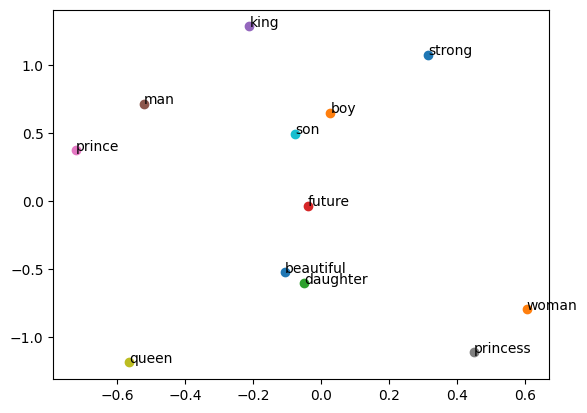

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')